1. 선형회귀의 가정에 대해 쓰고, 그 가정들을 설명해주세요.

- 선형성, 등분산성, 정규성, 독립성
- 선형성: 당연히! 선형회귀이기에 선형성을 띄어야함. 독립변수와 종속변수 간에 선형 관계를 가져야함.! 시각화를 통해 알아볼 수 있다.

- 등분산성: 잔차의 분산은 모두 동일해야한다. x별 예측되는 잔차의 분산이 모두 동일해야함. 그래프를 참조하세요~~~
- 정규성: 잔차는 정규분포를 따라야합니다. 그래프 참조~ -> qq플롯, shapiro-wilk 테스트 p값(0.05기준)

ㅇ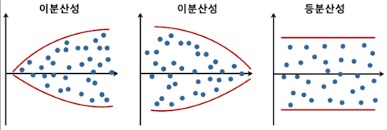

이분산의 예시: 잔차의 분산이 시그마가 아니라 시그마 * x 인 경우!

1. 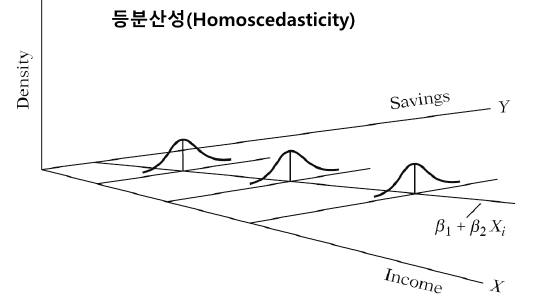

- 독립성: x 변수들 사이에서 독립이 보장되어야함 (ex. 다중공선성, Multicolinearlity) / 잔차들 간 독립이 보장되어야함(자기상관성)
- x 변수들 종류 간에 상관관계가 있어서는 안됨, 예를 들어 식물의 성장속도를 추정하는 선형회귀에서 x 변수가 섭씨 온도, 화씨온도라면 x변수 간 상관관계가 크므로 어떤 변수가 y에 영향을 미치는지 정확히 판단할 수 없다.
- 다중공선성: x 변수들 간에 상관관계가 있는 것을 다중공선성이라고 부름.
- 자기상관성: 잔차들 간에 독립성이 보장되지 않는 경우를 일컫음. (주로 시계열에서 나타난다. 앞 데이터의 잔차가 그 다음 데이터에 영향을 주는 경우.) -> 더빈왓슨 테스트

+) 이 모든 가정을 지켰을 때 최소제곱합을 통한 추정계수는 BLUE(Best Linear Unbiased Estimator) 입니당

더빈-왓슨 테스트가 무엇인지, 무엇을 위해 쓰는지 설명해주세요.

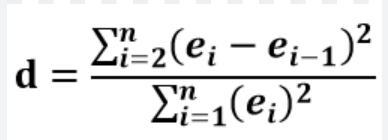

참고! d 가 2와 비슷하게 여겨지는 이유!

In [ ]:
import numpy as np #모듈불러오기
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson

2.  statsmodels를 이용하여 선형회귀를 진행하고, 모델의 가정을 검증 해주세요.(scatter, shapiro-willk, 더빈 왓슨, q-q, 잔차의 분산)

In [ ]:
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

In [ ]:

x = data['MedInc']
y = data['MedHouseVal']


In [ ]:
x = sm.add_constant(x)

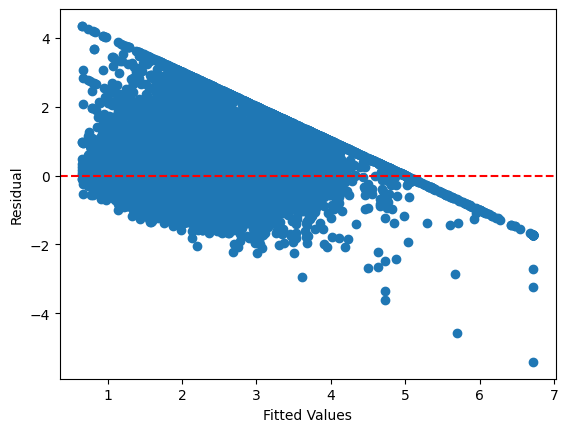

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test: Statistics=0.922, p=0.000
Durbin-Watson Statistics 0.6545256909553094


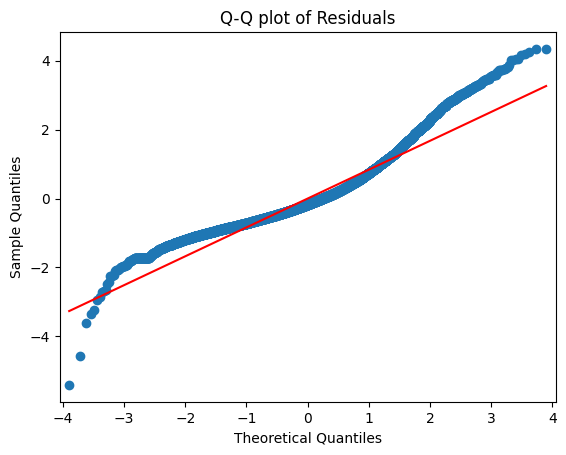

Text(0.5, 1.0, 'Residual plot with Lowess Line')

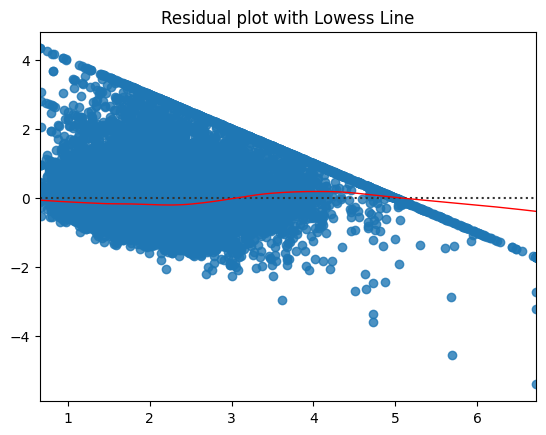

In [ ]:
#선형회귀 모델 적합
model = sm.OLS(y, sm.add_constant(x)).fit()

#잔차의 플롯
residuals = model.resid # 잔차를 뽑아서
fitted = model.fittedvalues

## 1번
# scatter로 그래프 확인
plt.scatter(fitted, residuals) # 잔차 그래프
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.axhline(0, color= 'red', linestyle='--')
plt.show()

# 2번 정규성 검정 : shapiro - Wilk 테스트
stat, p = shapiro(residuals)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

# 3번 더빈 왓슨 테스트
dw_stat = durbin_watson(residuals)
print('Durbin-Watson Statistics', dw_stat)

# 4번 정규성 검정 Q-Q플롯
fig =sm.qqplot(residuals, line='s')
plt.title('Q-Q plot of Residuals')
plt.show()

# 5번 등분산성 검정 :잔차의 분산 플롯

sns.residplot(x=fitted, y = residuals, lowess= True , line_kws = {'color':'red', 'lw':1})
plt.title('Residual plot with Lowess Line')